### Project 6: Sentiment Analysis on Social Media Data

## Step 1: Import Libraries

In [6]:
!pip install textblob


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 624.3/624.3 KB 12.1 kB/s eta 0:00:0031m11.7 kB/s eta 0:00:02


In [7]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from textblob import TextBlob


## Step 2: Collect Data

Option A: Use Twitter API (Tweepy) (requires developer account).

Option B: For practice, we’ll simulate with a sample dataset of tweets.

In [8]:
data = {
    "tweet": [
        "I love the new iPhone, the camera is amazing! 📱😍",
        "This is the worst service I’ve ever used. Terrible experience!",
        "It’s okay, nothing special about this product.",
        "Feeling happy about the launch event today 🎉",
        "Ugh, the update broke my phone. Hate it!",
        "The movie was fantastic, had a great time watching it."
    ]
}

df = pd.DataFrame(data)
print(df)


                                               tweet
0   I love the new iPhone, the camera is amazing! 📱😍
1  This is the worst service I’ve ever used. Terr...
2     It’s okay, nothing special about this product.
3       Feeling happy about the launch event today 🎉
4           Ugh, the update broke my phone. Hate it!
5  The movie was fantastic, had a great time watc...


## Step 3: Data Cleaning

Social media data often has hashtags, mentions, URLs, emojis. Let’s clean it.

In [9]:
def clean_text(text):
    text = re.sub(r"@\w+", "", text)         # Remove mentions
    text = re.sub(r"#\w+", "", text)         # Remove hashtags
    text = re.sub(r"http\S+", "", text)      # Remove URLs
    text = re.sub(r"[^A-Za-z\s]", "", text)  # Remove emojis/symbols
    return text.lower().strip()

df["clean_tweet"] = df["tweet"].apply(clean_text)
print(df[["tweet", "clean_tweet"]])


                                               tweet  \
0   I love the new iPhone, the camera is amazing! 📱😍   
1  This is the worst service I’ve ever used. Terr...   
2     It’s okay, nothing special about this product.   
3       Feeling happy about the launch event today 🎉   
4           Ugh, the update broke my phone. Hate it!   
5  The movie was fantastic, had a great time watc...   

                                         clean_tweet  
0        i love the new iphone the camera is amazing  
1  this is the worst service ive ever used terrib...  
2        its okay nothing special about this product  
3         feeling happy about the launch event today  
4              ugh the update broke my phone hate it  
5  the movie was fantastic had a great time watch...  


## Step 4: Sentiment Analysis with TextBlob

TextBlob gives polarity (–1 = negative, +1 = positive) and subjectivity.

In [10]:
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return "Positive"
    elif analysis.sentiment.polarity < 0:
        return "Negative"
    else:
        return "Neutral"

df["sentiment"] = df["clean_tweet"].apply(get_sentiment)
print(df[["tweet", "sentiment"]])


                                               tweet sentiment
0   I love the new iPhone, the camera is amazing! 📱😍  Positive
1  This is the worst service I’ve ever used. Terr...  Negative
2     It’s okay, nothing special about this product.  Positive
3       Feeling happy about the launch event today 🎉  Positive
4           Ugh, the update broke my phone. Hate it!  Negative
5  The movie was fantastic, had a great time watc...  Positive


In [11]:
from textblob import TextBlob

# Function to classify sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return "Positive"
    elif analysis.sentiment.polarity < 0:
        return "Negative"
    else:
        return "Neutral"

# Apply to cleaned tweets
df["sentiment"] = df["clean_tweet"].apply(get_sentiment)

print(df[["tweet", "clean_tweet", "sentiment"]])


                                               tweet  \
0   I love the new iPhone, the camera is amazing! 📱😍   
1  This is the worst service I’ve ever used. Terr...   
2     It’s okay, nothing special about this product.   
3       Feeling happy about the launch event today 🎉   
4           Ugh, the update broke my phone. Hate it!   
5  The movie was fantastic, had a great time watc...   

                                         clean_tweet sentiment  
0        i love the new iphone the camera is amazing  Positive  
1  this is the worst service ive ever used terrib...  Negative  
2        its okay nothing special about this product  Positive  
3         feeling happy about the launch event today  Positive  
4              ugh the update broke my phone hate it  Negative  
5  the movie was fantastic had a great time watch...  Positive  


## Step 5: Visualization

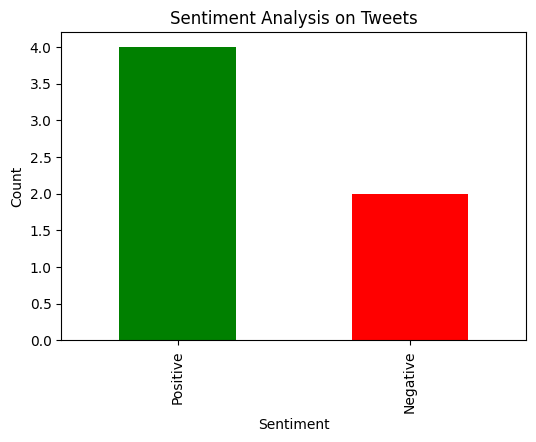

In [12]:
sentiment_counts = df["sentiment"].value_counts()

plt.figure(figsize=(6,4))
sentiment_counts.plot(kind="bar", color=["green","red","gray"])
plt.title("Sentiment Analysis on Tweets")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


## ✅ Insights

Positive tweets → Praise for product/events.

Negative tweets → Complaints about service/bugs.

Neutral tweets → Mixed/average opinions.